# **Taller 2 - Servicios inmobiliarios**

### **Integrantes:**
- María Alejandra Pérez Petro - 201923972
- Daniel Esteban Aguilera Figueroa - 202010592 

# Librerias

Se importan las librerías necesarias para el análisis de los datos.

In [11]:
import numpy as np
import pandas as pd
    
# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# estadisticas
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [27]:
%matplotlib inline

# **1. Entendimiento de los datos**
En esta sección se cargan los datos presentados en el archivo `apartamentos.csv`, se revisan las dimensiones y se seleccionan las caracteristicas a analizar.

Se cargan los datos

In [12]:
apartamentos_df: pd.DataFrame = pd.read_csv("./data/apartamentos.csv")

Se revisan las dimensiones del dataset. Este cuenta con 46 columnas y 43013 filas

In [13]:
apartamentos_df.shape

(43013, 46)

Se listan los atributos (columnas) del dataset y sus tipos

In [14]:
apartamentos_df.dtypes

_id                         object
codigo                      object
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea            

se muestran las primeras filas para entender la estructura de los datos

In [15]:
apartamentos_df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,...,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,...,0.0,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,...,0.0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,...,0.0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,158000000.0,43.0,2.0,2.0,106600.0,0.0,...,0.0,False,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0,PARQUE ZONAL LA GAITANA,539.98,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,222800000.0,48.0,3.0,2.0,151000.0,0.0,...,0.0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0


De igual manera, se hace un profilling general para una mejor revisión de todas las variables

In [16]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(apartamentos_df)

In [17]:
# profile.to_file('data/report.html')

## Top 10 atributos más importantes para el análisis

Considerando el funcionamiento del mercado inmobiliario bogotano, el objetivo de HabitAlpes de construir un modelo de estimación de precios confiable y los determinantes clásicos del valor de vivienda, se identifican los siguientes 10 atributos como los más relevantes para predecir el precio de venta de un apartamento:

1. area: Superficie total del apartamento en metros cuadrados. Es el predictor más influyente del precio porque refleja directamente el tamaño del activo. A mayor área, mayor precio absoluto, con variaciones según sector y estrato.

2. habitaciones: Cantidad de habitaciones disponibles. Este atributo determina la distribución interna y el potencial de uso del inmueble.

3. banos: Número total de baños. Está altamente correlacionado con el nivel de comodidad y el estándar del apartamento.

4. estrato: Clasificación socioeconómica (1 a 6).

5. barrio: Ubicación específica del inmueble.

6. sector: Zona general donde se ubica el apartamento.

7. localidad: División administrativa de Bogotá.

8. parqueaderos: Número de parqueaderos asignados.

9. piso: Nivel dentro del edificio en el que se ubica el apartamento.

10. antiguedad: Edad del inmueble. Los apartamentos más nuevos tienden a ser más costosos debido a mejores especificaciones, materiales más recientes y menor desgaste.

# **2. Calidad de los datos**

En esta sección se analiza la calidad de los datos para determinar si son adecuados para el análisis. Sin embargo, a la hora de la creación del modelo es posible realizar una selección de variables más robusta con el fin de mejorar el modelo.

In [19]:
# Análisis de valores nulos en variables clave
vars_analisis = ['area', 'habitaciones', 'banos', 'parqueaderos', 'piso', 'antiguedad', 
                 'sector', 'localidad', 'barrio', 'estrato', 'precio_venta']

nulos_df = pd.DataFrame({
    'Variable': vars_analisis,
    'Valores Nulos': [apartamentos_df[var].isnull().sum() for var in vars_analisis],
    'Porcentaje': [(apartamentos_df[var].isnull().sum() / len(apartamentos_df)) * 100 for var in vars_analisis]
})

nulos_df = nulos_df.sort_values('Porcentaje', ascending=False)

print("="*70)
print("ANÁLISIS DE VALORES NULOS EN VARIABLES CLAVE")
print("="*70)
print(nulos_df.to_string(index=False))
print("="*70)

ANÁLISIS DE VALORES NULOS EN VARIABLES CLAVE
    Variable  Valores Nulos  Porcentaje
        piso          43013  100.000000
precio_venta          15429   35.870551
      sector           1641    3.815126
      barrio            193    0.448702
  antiguedad             10    0.023249
habitaciones              1    0.002325
       banos              1    0.002325
     estrato              1    0.002325
parqueaderos              1    0.002325
        area              0    0.000000
   localidad              0    0.000000


**Observaciones sobre calidad de datos:**
- La variable **`piso`** tiene 100% de valores nulos (43,013), lo que indica que esta información no está disponible en el dataset
- **`precio_venta`** tiene 35.9% de valores nulos, lo cual es significativo para análisis de precios
- **`sector`** presenta 3.8% de valores nulos
- Variables como `area`, `habitaciones`, `banos`, `parqueaderos`, y `estrato` tienen <0.01% nulos

## Estadísticas Descriptivas - Variables Numéricas

In [38]:
vars_numericas = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', 'precio_venta']
apartamentos_df[vars_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
area,43013.0,1.800341e+02,9.163002e+03,0.0,63.0,100.0,1.740000e+02,1.900000e+06
habitaciones,43012.0,2.615340e+00,8.500458e-01,1.0,2.0,3.0,3.000000e+00,7.000000e+00
banos,43012.0,2.701339e+00,1.196659e+00,0.0,2.0,3.0,4.000000e+00,6.000000e+00
parqueaderos,43012.0,1.662862e+00,1.114685e+00,-2.0,1.0,2.0,2.000000e+00,3.000000e+01
estrato,43012.0,4.844648e+00,1.236190e+00,0.0,4.0,5.0,6.000000e+00,6.000000e+00
precio_venta,27584.0,2.364794e+09,5.574198e+10,1000000.0,402900000.0,700000000.0,1.330000e+09,4.250000e+12


#### **Área (m²)**
- **Media:** 180 m²
- **Mediana:** 100 m²  
- **Rango:** 0 - 1,900,000 m² (valores extremos sugieren outliers o errores)

#### **Habitaciones**
- **Media:** 2.6 habitaciones
- **Rango:** 1-7 habitaciones

#### **Baños**
- **Media:** 1.8 baños
- **Rango:** 1-7 baños

#### **Parqueaderos**
- **Media:** 1.2 parqueaderos
- **Rango:** 0-7 parqueaderos

#### **Estrato**
- **Media:** 4.8
- **Rango:** 0-6


#### **Precio de Venta**
- **Media:** $2,364,794,000 COP (~2.36 mil millones)
- **Mediana:** $700,000,000 COP
- Gran diferencia entre media y mediana indica presencia de propiedades de muy alto valor

## Análisis de variables númericas

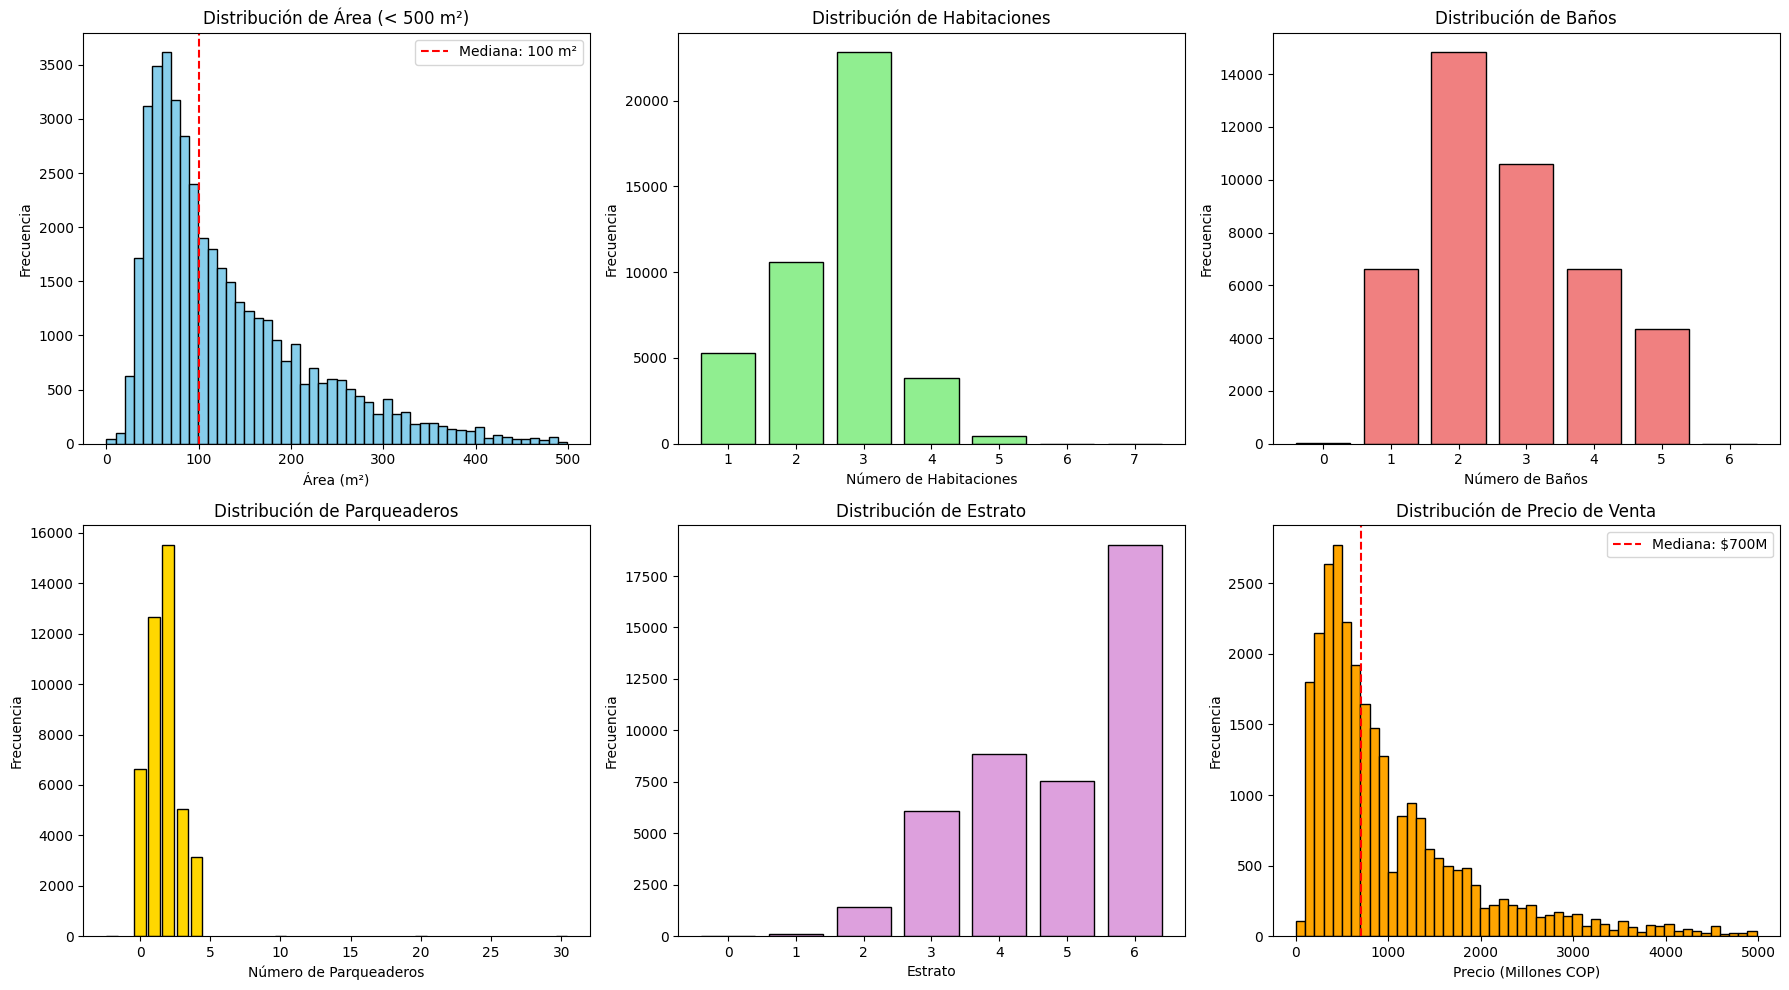

In [30]:
# Visualización de distribuciones
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Área (filtrada para mejor visualización)
area_filtrada = apartamentos_df[apartamentos_df['area'] < 500]['area']
axes[0, 0].hist(area_filtrada, bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Área (< 500 m²)')
axes[0, 0].set_xlabel('Área (m²)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(apartamentos_df['area'].median(), color='red', linestyle='--', label=f'Mediana: {apartamentos_df["area"].median():.0f} m²')
axes[0, 0].legend()

# 2. Habitaciones
habitaciones_counts = apartamentos_df['habitaciones'].value_counts().sort_index()
axes[0, 1].bar(habitaciones_counts.index, habitaciones_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribución de Habitaciones')
axes[0, 1].set_xlabel('Número de Habitaciones')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_xticks(range(1, 8))

# 3. Baños
banos_counts = apartamentos_df['banos'].value_counts().sort_index()
axes[0, 2].bar(banos_counts.index, banos_counts.values, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Distribución de Baños')
axes[0, 2].set_xlabel('Número de Baños')
axes[0, 2].set_ylabel('Frecuencia')

# 4. Parqueaderos
parqueaderos_counts = apartamentos_df['parqueaderos'].value_counts().sort_index()
axes[1, 0].bar(parqueaderos_counts.index, parqueaderos_counts.values, color='gold', edgecolor='black')
axes[1, 0].set_title('Distribución de Parqueaderos')
axes[1, 0].set_xlabel('Número de Parqueaderos')
axes[1, 0].set_ylabel('Frecuencia')

# 5. Estrato
estrato_counts = apartamentos_df['estrato'].value_counts().sort_index()
axes[1, 1].bar(estrato_counts.index, estrato_counts.values, color='plum', edgecolor='black')
axes[1, 1].set_title('Distribución de Estrato')
axes[1, 1].set_xlabel('Estrato')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_xticks(range(0, 7))

# 6. Precio de Venta (log scale para mejor visualización)
precio_filtrado = apartamentos_df['precio_venta'].dropna()
precio_filtrado = precio_filtrado[(precio_filtrado > 0) & (precio_filtrado < 5e9)]
axes[1, 2].hist(precio_filtrado / 1e6, bins=50, color='orange', edgecolor='black')
axes[1, 2].set_title('Distribución de Precio de Venta')
axes[1, 2].set_xlabel('Precio (Millones COP)')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].axvline(apartamentos_df['precio_venta'].median() / 1e6, color='red', linestyle='--', 
                    label=f'Mediana: ${apartamentos_df["precio_venta"].median()/1e6:.0f}M')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

## Análisis de variables categóricas

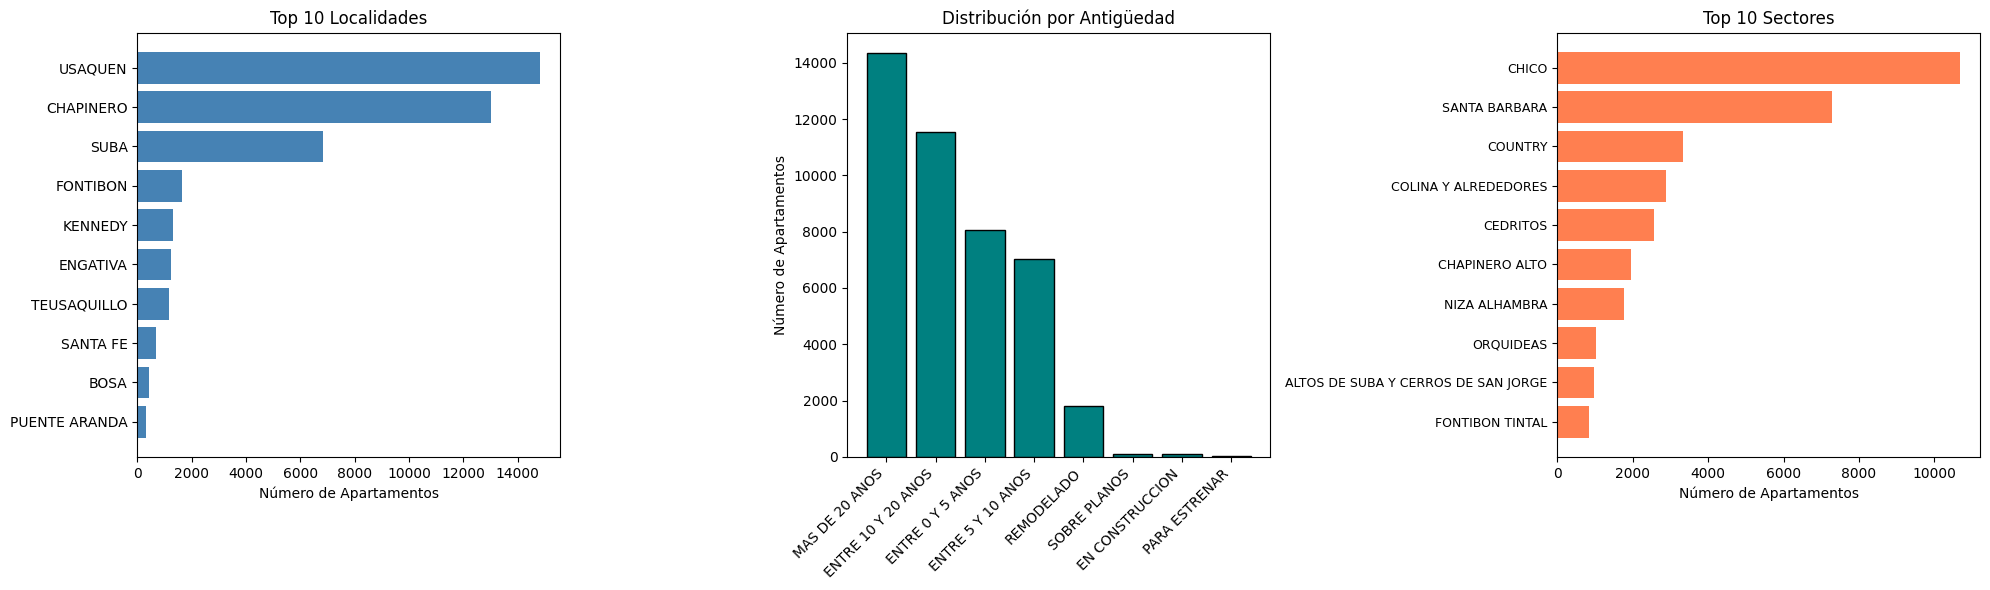

In [32]:
# Visualización de variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Top 10 Localidades
localidad_top10 = apartamentos_df['localidad'].value_counts().head(10)
axes[0].barh(range(len(localidad_top10)), localidad_top10.values, color='steelblue')
axes[0].set_yticks(range(len(localidad_top10)))
axes[0].set_yticklabels(localidad_top10.index)
axes[0].set_xlabel('Número de Apartamentos')
axes[0].set_title('Top 10 Localidades')
axes[0].invert_yaxis()

# 2. Antigüedad
antiguedad_counts = apartamentos_df['antiguedad'].value_counts()
axes[1].bar(range(len(antiguedad_counts)), antiguedad_counts.values, color='teal', edgecolor='black')
axes[1].set_xticks(range(len(antiguedad_counts)))
axes[1].set_xticklabels(antiguedad_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Número de Apartamentos')
axes[1].set_title('Distribución por Antigüedad')

# 3. Top 10 Sectores
sector_top10 = apartamentos_df['sector'].value_counts().head(10)
axes[2].barh(range(len(sector_top10)), sector_top10.values, color='coral')
axes[2].set_yticks(range(len(sector_top10)))
axes[2].set_yticklabels(sector_top10.index, fontsize=9)
axes[2].set_xlabel('Número de Apartamentos')
axes[2].set_title('Top 10 Sectores')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


## Análisis Multivariado

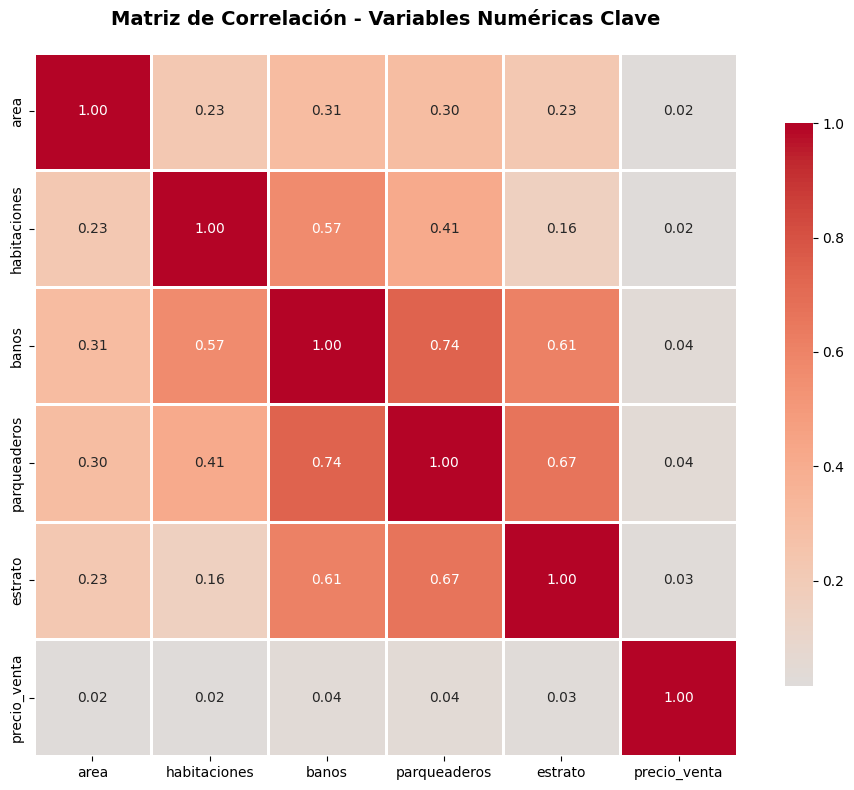


CORRELACIONES CON PRECIO DE VENTA (ordenadas)
parqueaderos    → +0.042
banos           → +0.037
estrato         → +0.026
habitaciones    → +0.022
area            → +0.016


In [ ]:
# Matriz de correlación para variables numéricas
vars_correlacion = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', 'precio_venta']
df_correlacion = apartamentos_df[vars_correlacion].dropna()

corr_matrix = df_correlacion.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas Clave', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12549/1203312336.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_precio_estrato, x='estrato', y='precio_venta', ax=axes[0], palette='viridis')


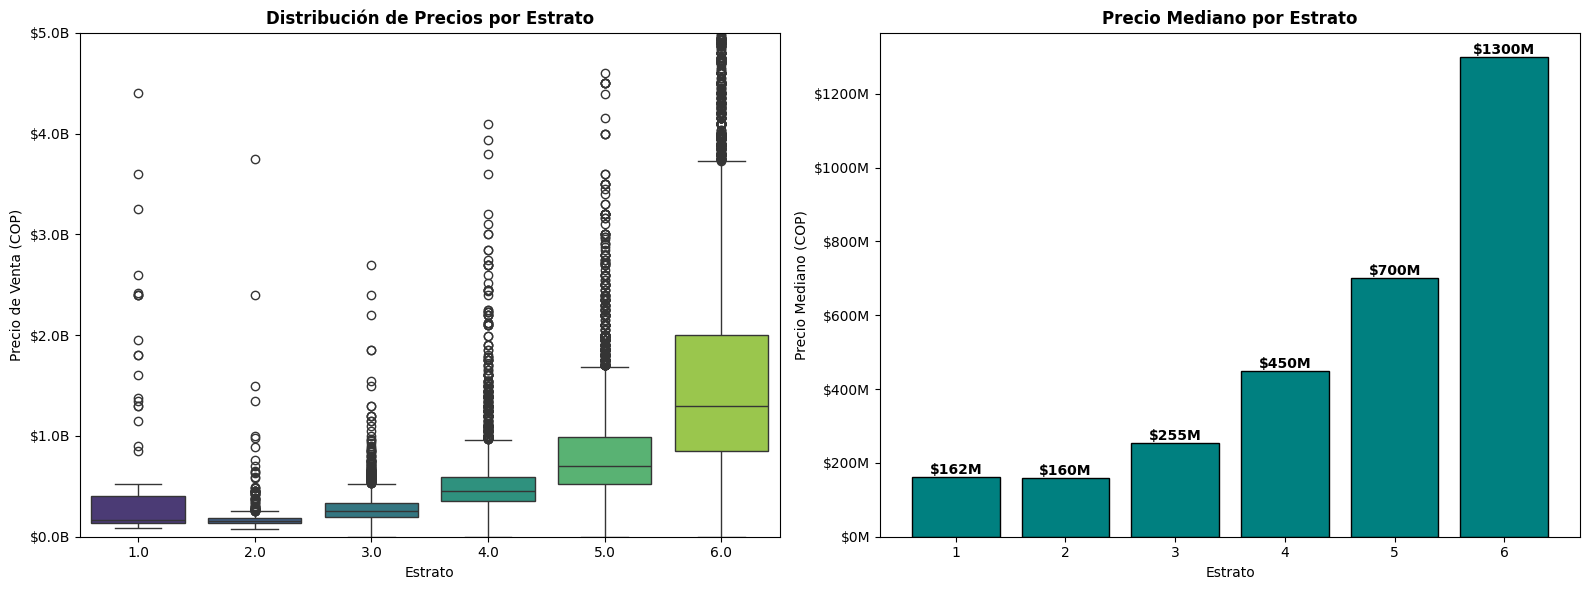

In [ ]:
# Análisis de precio por estrato
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot de precio por estrato
df_precio_estrato = apartamentos_df[(apartamentos_df['precio_venta'] > 0) & 
                                     (apartamentos_df['precio_venta'] < 5e9) &
                                     (apartamentos_df['estrato'] > 0)]

sns.boxplot(data=df_precio_estrato, x='estrato', y='precio_venta', ax=axes[0], palette='viridis')
axes[0].set_title('Distribución de Precios por Estrato', fontweight='bold')
axes[0].set_xlabel('Estrato')
axes[0].set_ylabel('Precio de Venta (COP)')
axes[0].set_ylim(0, 5e9)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

# Gráfico 2: Precio promedio por estrato
precio_por_estrato = df_precio_estrato.groupby('estrato')['precio_venta'].median().sort_index()
axes[1].bar(precio_por_estrato.index, precio_por_estrato.values, color='teal', edgecolor='black')
axes[1].set_title('Precio Mediano por Estrato', fontweight='bold')
axes[1].set_xlabel('Estrato')
axes[1].set_ylabel('Precio Mediano (COP)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

for i, (estrato, precio) in enumerate(precio_por_estrato.items()):
    axes[1].text(estrato, precio, f'${precio/1e6:.0f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


/tmp/ipykernel_12549/1222540283.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_area_hab, x='habitaciones', y='area', ax=axes[0], palette='Set2')


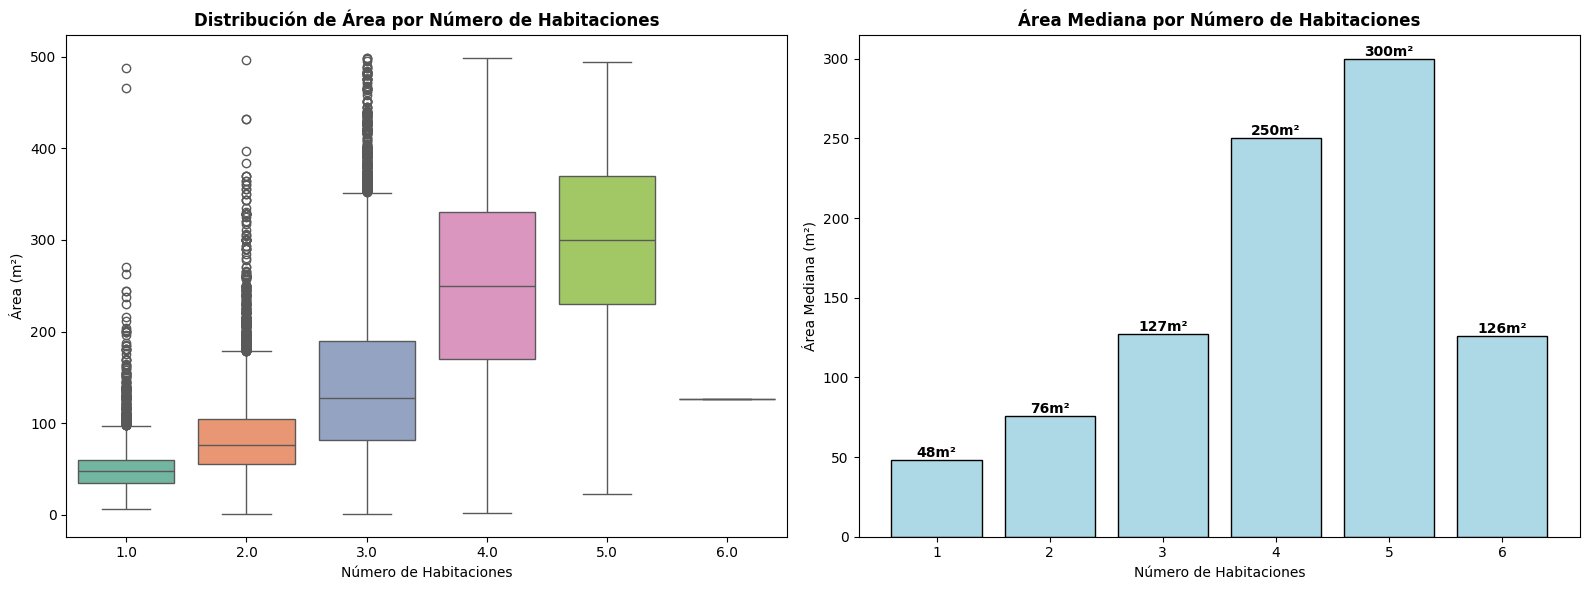

In [ ]:
# Análisis de área por número de habitaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot área por habitaciones
df_area_hab = apartamentos_df[(apartamentos_df['area'] > 0) & 
                               (apartamentos_df['area'] < 500) &
                               (apartamentos_df['habitaciones'] <= 6)]

sns.boxplot(data=df_area_hab, x='habitaciones', y='area', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución de Área por Número de Habitaciones', fontweight='bold')
axes[0].set_xlabel('Número de Habitaciones')
axes[0].set_ylabel('Área (m²)')

# Gráfico 2: Área promedio por habitaciones
area_por_hab = df_area_hab.groupby('habitaciones')['area'].median().sort_index()
axes[1].bar(area_por_hab.index, area_por_hab.values, color='lightblue', edgecolor='black')
axes[1].set_title('Área Mediana por Número de Habitaciones', fontweight='bold')
axes[1].set_xlabel('Número de Habitaciones')
axes[1].set_ylabel('Área Mediana (m²)')

for i, (hab, area) in enumerate(area_por_hab.items()):
    axes[1].text(hab, area, f'{area:.0f}m²', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
